# Question 1

Write a python function that returns $2\sin(x^2) + \ln(|x|) + 1$ for a given real number $x$.

In [4]:
def equation(x):
    val=2*math.sin(x*x)+math.log(abs(x))+1
    return val

# Question 2

Write a python function that takes

* A function `f(x)`
* A pair of real numbers `(a,b)`
* An integer `N`

as input and returns the Riemann sum of `f(x)` on the interval `[a,b]` with `N` equal subdivisions.

In [1]:
def f(x):
	return x**(1/2)

def reiman_calc(function,a,b,N): 

	interval=b-a
	width=interval/N
	rieman=0
	for i in range (1,N):
		temp = function(a+width*i)
		rieman=rieman+temp

	return rieman

result = reiman_calc(f,0.5,3.5,4)
print(result)

4.19055994630069


# Question 3

* Pull 100 uniformly random numbers from the interval $[0,1]$ as an array `xs`.
* Add 0 at the beginning of the array, and 1.0 at the end.
* Sort the array `xs` from smallest to the largest.
* Calculate its discrete derivative `ys`, i.e. let $y_i = x_{i+1} - x_i$

In [2]:
import random

xs = []
xs.append(0.0)

for i in range(100):
	x = random.uniform(0.0,1.0)
	xs.append(x) 

xs.append(1.0)
xs.sort()

ys = []
for i in range(101):
	ys.append(xs[i+1]-xs[i])

# Question 4

* Pull 100 uniformly random numbers from the interval $[0,1]$ into an array `xs`.
* Pull 100 random numbers from the Gaussion distribution with $\mu=0$ and $\sigma=1.0$ into an array `ys`.
* Scatter plot `xs` against `ys` using `matplotlib`


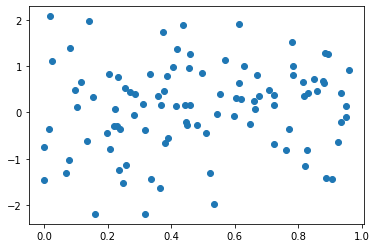

In [3]:
import random
import matplotlib.pyplot as plt

xs = []

for i in range(100):
	x = random.uniform(0.0,1.0)
	xs.append(x) 

ys = []
for i in range(100):
	y = random.gauss(0,1.0)
	ys.append(y)

plt.scatter(xs,ys)
plt.show()

# Question 5

Using the `numpy` library

* Pull a random $100\times 100$ matrix
* Calculate its 100-th power
* Calculate its eigen-values
* Calculate is [Singular Value Decomposition](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html)

In [4]:
import numpy as np

m = np.random.rand(100,100)
p = np.linalg.matrix_power(m,100)
e = np.linalg.eig(m)
s = np.linalg.svd(m)

# Question 6

* Pull the text of a novel by Dickens from the website of [Gutenberg Project](https://www.gutenberg.org/)
* Remove all non-alphanumeric characters 
* Split the text into words and convert them into lower case
* Count the number of distinct words in the  text
* Count how many times each word occurs within the text

In [5]:
import requests
from bs4 import BeautifulSoup as bs
import re
import string
from collections import Counter

r = requests.get('https://www.gutenberg.org/files/766/766-h/766-h.htm#link2HCH0001')
page = r.content
s = bs(page, 'html.parser')
text = s.find_all(text = True)
output = ''
blacklist = ['/n', '/r']

for t in text:
	if t.parent.name not in blacklist:
		output += '{} '.format(t)

words = [re.sub('^[{0}]+|[{0}]+$'.format(string.punctuation), '', w) for w in output.split()]

distinct_words = len(set(words))
count_dict = dict(Counter(words).items())

# Question 7

* Write a python function `CountWords` that takes the URL for a text and returns the number of unique words within the text.
* Write a python function `Top20Words` that takes the URL for a text and returns the most frequently appearing top 20 words within the text.

In [6]:
import requests
from bs4 import BeautifulSoup as bs
import re
import string
from collections import Counter

def CountWords(url):
	r = requests.get(url)
	page = r.content
	s = bs(page, 'html.parser')
	text = s.find_all(text = True)
	output = ''
	blacklist = ['/n', '/r']

	for t in text:
		if t.parent.name not in blacklist:
			output += '{} '.format(t)

	words = [re.sub('^[{0}]+|[{0}]+$'.format(string.punctuation), '', w) for w in output.split()]

	distinct_words = len(set(words))
	return distinct_words

def Top20Words(url):
	r = requests.get(url)
	page = r.content
	s = bs(page, 'html.parser')
	text = s.find_all(text = True)
	output = ''
	blacklist = ['/n', '/r']

	for t in text:
		if t.parent.name not in blacklist:
			output += '{} '.format(t)

	words = [re.sub('^[{0}]+|[{0}]+$'.format(string.punctuation), '', w) for w in output.split()]

	count_dict = dict(Counter(words).items())

	top_20_counts = sorted(count_dict.items(), key=lambda x: x[1], reverse=True)[:20]
	top_20 = [item[0] for item in top_20_counts]

	return top_20

# Question 8

* Pull the [IMKB](https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx) data from UCI using pandas.
* Plot the TL based ISE and USD based ISE columns together in the same graph.
* Calculate how many times `NIKKEI` was higher than `FTSE`.

/Users/burak.cakan/opt/anaconda3/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:300: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


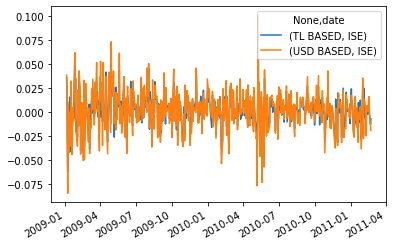

In [7]:
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_excel('https://archive.ics.uci.edu/ml/machine-learning-databases/00247/data_akbilgic.xlsx', header = [0, 1], index_col = 0, engine = 'openpyxl')
data.plot.line(y = [0 ,1])
plt.show()

dlist = data.values.tolist()

count = 0
for i in range(len(dlist)):
	if dlist[i][5] > dlist[i][4]:
		count += 1

# Question 9

Using the [networkx](https://networkx.org/) library

* Get the [adjacency matrix](https://en.wikipedia.org/wiki/Adjacency_matrix) of the [Peterson graph](https://en.wikipedia.org/wiki/Petersen_graph).
* Calculate its eigen-values and eigen-vectors using the [numpy](https://numpy.org/) library.
* Repeat the same for a [random 3-regular graph on 10 vertices](https://networkx.org/documentation/networkx-1.10/reference/generated/networkx.generators.random_graphs.random_regular_graph.html).

In [8]:
import networkx as nx 
import numpy as np

pet = nx.petersen_graph()
adj = nx.linalg.graphmatrix.adjacency_matrix(pet)

mx = nx.convert_matrix.to_numpy_matrix(pet)
e_val, e_vec = np.linalg.eig(mx)

In [9]:
import networkx as nx 
import numpy as np

g = nx.generators.random_graphs.random_regular_graph(3,10)
adj = nx.linalg.graphmatrix.adjacency_matrix(g)

mx = nx.convert_matrix.to_numpy_matrix(g)
e_val, e_vec = np.linalg.eig(mx)